Selamat datang di Airbnb Analysis Corp! Tugas kita adalah menetapkan harga harian yang bersaing untuk rumah klien di Bondi Beach. Saat ini, pemilik menetapkan harga $500. Kita perlu memperkirakan nilai yang adil yang seharusnya dienakkan oleh pemilik. Berikut adalah info tentang rumah tersebut. Saat kita bikin model ini, kita menyadari bahwa Airbnb bisa pakai model ini untuk tentuin harga yang adil buat properti apa pun di database mereka; kita praktis bikin saran harga buat semua calon tuan rumah!

Pemilik sudah menjadi tuan rumah sejak Agustus 2010
Lokasi: lon:151.274506, lat:33.889087
Skor ulasan saat ini 95,0 dengan 53 ulasan
Menginap minimum 4 malam
Rumah bisa menampung 10 orang.
Pemilik saat ini menetapkan biaya kebersihan sebesar $370
Rumah memiliki 3 kamar mandi, 5 kamar tidur, 7 tempat tidur.
Rumah tersedia selama 255 dari 365 hari berikutnya
Klien terverifikasi, dan mereka adalah tuan rumah super.
Kebijakan pembatalan ketat dengan periode penangguhan 14 hari.
Tuan rumah memerlukan deposit keamanan sebesar $1,500
Semua nilai ini berlaku ketat untuk bulan Juli 2018.







In [1]:
# Defining the sample client data
from dateutil import parser
dict_client = {}

dict_client['city'] = 'Bondi Beach'
dict_client['longitude'] = 151.274506
dict_client['latitude'] = -33.889087
dict_client['review_scores_rating'] = 95
dict_client['number_of_reviews'] = 53
dict_client['minimum_nights'] = 4
dict_client['accommodates'] = 10
dict_client['bathrooms'] = 3
dict_client['bedrooms'] = 5
dict_client['beds'] = 7
dict_client['security_deposit'] = 1500
dict_client['cleaning_fee'] = 370
dict_client['property_type'] = 'House'
dict_client['room_type'] = 'Entire home/apt'
dict_client['availability_365'] = 255 
dict_client['host_identity_verified'] = 't' ## 1 for yes, 0 for no 
dict_client['host_is_superhost'] = 't'
dict_client['cancellation_policy'] = 'strict_14_with_grace_period'
dict_client['host_since'] = parser.parse('01-08-2010')

Get The Data

In [2]:
from pathlib import Path
import pandas as pd

df = pd.read_csv('/kaggle/input/sydney-airbnb/sydney_airbnb.csv')
df.head()

/tmp/ipykernel_18/4153482700.py:4: DtypeWarning: Columns (36,54,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/sydney-airbnb/sydney_airbnb.csv')


,id,listing_url,name,summary,space,description,neighborhood_overview,notes,transit,access,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,11156,https://www.airbnb.com/rooms/11156,An Oasis in the City,Very central to the city which can be reached ...,Potts Pt. is a vibrant and popular inner-city...,Very central to the city which can be reached ...,"It is very close to everything and everywhere,...","$150.00 key security deposit, refundable on re...",It is 7 minutes walk to the Kings Cross.train ...,Kitchen & laundry facilities. Shared bathroom.,...,10.0,10.0,10.0,9.0,f,moderate,f,f,1,1.69
1,12351,https://www.airbnb.com/rooms/12351,Sydney City & Harbour at the door,Come stay with Vinh & Stuart (Awarded as one o...,"We're pretty relaxed hosts, and we fully appre...",Come stay with Vinh & Stuart (Awarded as one o...,"Pyrmont is an inner-city village of Sydney, on...",We've a few reasons for the 6.00pm arrival tim...,Our home is centrally located and an easy walk...,We look forward to welcoming you just as we wo...,...,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period,t,t,2,4.83
2,14250,https://www.airbnb.com/rooms/14250,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Our home is a thirty minute walk along the sea...,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,NaN,Balgowlah - Manly bus # 131 or #132 (Bus stop...,Guests have access to whole house except locke...,...,10.0,8.0,10.0,10.0,f,strict_14_with_grace_period,f,f,2,0.03
3,14935,https://www.airbnb.com/rooms/14935,Eco-conscious Travellers: Private Room,Welcome! This apartment will suit a short term...,I live upstairs in my own room with my own bat...,Welcome! This apartment will suit a short term...,NaN,"The building can be hard to find, so please en...",DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,10.0,9.0,9.0,f,moderate,f,f,2,2.14
4,14974,https://www.airbnb.com/rooms/14974,Eco-conscious Traveller: Sofa Couch,Welcome! This apartment will suit a short term...,Comes with a fully equipped gym and pool - whi...,Welcome! This apartment will suit a short term...,NaN,I live upstairs in my own room with my own bat...,DIRECTIONS VIA TAXI: Get dropped off at Renwic...,"I work from home most times - so if I'm home, ...",...,9.0,9.0,9.0,9.0,f,moderate,f,f,2,1.78


In [3]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [4]:
# We just use some features
incl = ['price', 'city', 'longitude', 'latitude', 'review_scores_rating', 'number_of_reviews', 'minimum_nights', 'security_deposit', 'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'property_type', 'availability_365', 'host_identity_verified', 'host_is_superhost', 'host_since', 'cancellation_policy']

df = df[incl]

In [5]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,287,t,f,30/11/09,moderate


In [6]:
df.shape

(27070, 19)

The rpice field currently has '$' in it and is a string. Let's remove it and convert it to a float datatype.
Also convert 'host_since' into data time format.

In [7]:
# import regrex
import re

# The price fields in our data frame
price_list = ['price','cleaning_fee','security_deposit']

# We change any blanks to 0 and use our regex function to remove anythings that isn't a number
for col in price_list:
    df[col] = df[col].fillna('0')
    df[col] = df[col].apply(lambda x: float(re.sub('[^0-9eE.]','',x)) if len(x)>0 else 0)



In [8]:
df['host_since'] = pd.to_datetime(df['host_since'])

/tmp/ipykernel_18/410833246.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['host_since'] = pd.to_datetime(df['host_since'])


In [9]:
df['host_since'][4]

Timestamp('2009-11-30 00:00:00')

In [10]:
df['price'].sample(10)

20199     37.0
3318     189.0
5514     370.0
5160     161.0
2747     120.0
13925    150.0
21578    148.0
23847    940.0
10959     38.0
2478     170.0
Name: price, dtype: float64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        27070 non-null  float64       
 8   cleaning_fee            27070 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

<Axes: ylabel='price'>

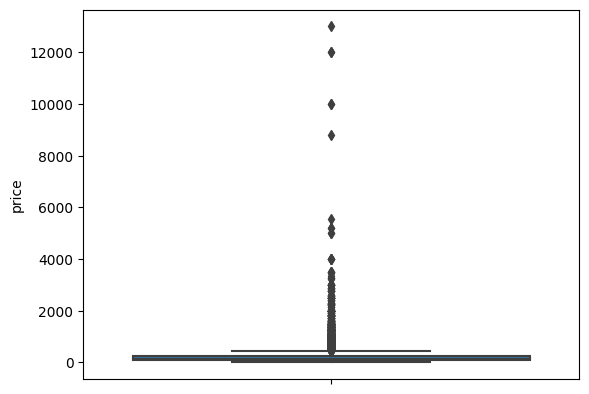

In [12]:
# Use boxplot to check for igh price values (outlier)
import seaborn as sns

sns.boxplot(y=df['price'])

In [13]:
# We can see a few high value prices, with the majority being close to bottom (seem like ~100-200)
# We now use skew to check for the summetry of the data distribution (0 being perfectly symetrical)
df['price'].skew()

13.808558337216192